In [5]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.2 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [6]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/32/a6/4321f0f30ee11d6d85f49251d417f4e885fe7638b5ac50b7e3c80cccf141/opencv_python-4.8.0.76-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 10.3 MB/s eta 0:00:0000:0100:01


In [100]:
def close_window_macos():
    cv2.destroyAllWindows()
    for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)

In [101]:
import cv2
import numpy as np

 # Opencv code to read and display image
color_img = cv2.imread("/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 1 -BG/theory/dataset/cat_image.jpeg", cv2.IMREAD_COLOR)
cv2.imshow("color_img", color_img)
cv2.waitKey(0)

# Opencv to convert color image to grayscale image
gray_image = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray_image", gray_image)
cv2.waitKey(0)
close_window_macos()


In [102]:
#Access the pixel value at position (x,y)
x = 0; y = 0
pixelValue = gray_image[y,x]
print("Pixel Value", pixelValue)

Pixel Value 0


In [103]:
#Access the pixel value at the image center (Grayscale)
width, height = gray_image.shape
x = int(width/2)
y = int(height/2)
pixelValue = gray_image[y,x]
print("Pixel Value", pixelValue)

Pixel Value 167


In [104]:
#Access the pixel value at the image center (Color)
width, height, channels = color_img.shape
x = 0; y = 0
pixelValue = color_img[y,x]
print("Pixel Value", pixelValue)

Pixel Value [0 0 0]


In [105]:
#Access the pixel value at the image center (Color)
width, height, channels = color_img.shape
x = int(width/2)
y = int(height/2)
pixelValue = color_img[y,x]
print("Pixel Value", pixelValue)

Pixel Value [156 167 171]


In [12]:
def close_window_os():
    cv2.destroyAllWindows()
    for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def gaussian_kernel(size, sigma):
    if size % 2 == 0:
        size = size + 1

    max_point = size // 2  # both directions (x,y) maximum cell start point
    min_point = -max_point  # both directions (x,y) minimum cell start point

    K = np.zeros((size, size))  # kernel matrix
    for x in range(min_point, max_point + 1):
        for y in range(min_point, max_point + 1):
            value = (1 / (2 * np.pi * (sigma ** 2)) * np.exp((-(x ** 2 + y ** 2)) 
                                                             / (2 * (sigma ** 2))))
            K[x - min_point, y - min_point] = value

    return K

kernel = gaussian_kernel(5, 1.4)
img = cv2.imread("/Users/nguyendinhvinh2004gmail.com/Downloads/canny_edge_detector-master/faces_imgs/2.jpg", 0)
img_gaussian = cv2.filter2D(img, -1, kernel)

cv2.imshow("img", img)
cv2.imshow("img_gaussian", img_gaussian)

cv2.waitKey(0)

close_window_os()



In [75]:
img_gaussian = np.float64(img_gaussian)
mask_x = np.zeros((2, 1))
mask_x[0] = -1
mask_x[1] = 1

I_x = cv2.filter2D(img_gaussian, -1, mask_x)
mask_y = mask_x.T
I_y = cv2.filter2D(img_gaussian, -1, mask_y)

Gm = (I_x ** 2 + I_y ** 2) ** 0.5
Gd = np.rad2deg(np.arctan2(I_y, I_x))

cv2.imshow("I_x", I_x)
cv2.imshow("I_y", I_y)
cv2.imshow("Gm", Gm)
cv2.imshow("Gd", Gd)

cv2.waitKey(0)
close_window_os()

In [47]:
def f_NMS(Gm, Gd):
    num_rows, num_cols = Gm.shape[0], Gm.shape[1]
    Gd_bins = 45 * (np.round(Gd / 45))

    G_NMS = np.zeros(Gm.shape)

    neighbor_a, neighbor_b = 0., 0.

    for r in range(1, num_rows - 1):
        for c in range(1, num_cols - 1):
            angle = Gd_bins[r, c]
            if angle == 180. or angle == -180. or angle == 0.:
                neighbor_a, neighbor_b = Gm[r + 1, c], Gm[r - 1, c]
            elif angle == 90. or angle == -90.:
                neighbor_a, neighbor_b = Gm[r, c - 1], Gm[r, c + 1]
            elif angle == 45. or angle == -135.:
                neighbor_a, neighbor_b = Gm[r + 1, c + 1], Gm[r - 1, c - 1]
            elif angle == -45. or angle == 135.:
                neighbor_a, neighbor_b = Gm[r - 1, c + 1], Gm[r + 1, c - 1]
            else:
                print("error")
                return

            if Gm[r, c] > neighbor_a and Gm[r, c] > neighbor_b:
                G_NMS[r, c] = Gm[r, c]

    return G_NMS

In [76]:
result_nms = f_NMS(Gm,Gd)
cv2.imshow("result_nms", result_nms)
cv2.waitKey(0)
close_window_os()

In [90]:


def threshold_edge(img, weak_pixel = 75, strong_pixel = 255):
    highT = 0.15
    lowT = 0.05
    
    highThreshold = img.max() * highT;
    lowThreshold = highThreshold * lowT;

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.uint8)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong_pixel
    res[weak_i, weak_j] = weak_pixel

    return res
    


In [96]:
result = threshold_edge(result_nms)
cv2.imshow("result", result)
cv2.waitKey(0)
close_window_os()

In [97]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

result = hysteresis(result, 75, 255)
cv2.imshow("result", result)
cv2.waitKey(0)
close_window_os()

In [19]:
#Ege Detection by Canny Algorithm
# Setting parameter values
t_lower = 250  # Lower Threshold
t_upper = 300  # Upper threshold

# Applying the Canny Edge filter
edge_canny = cv2.Canny(gray_image, t_lower, t_upper)

cv2.imshow("edge_canny", edge_canny)
cv2.waitKey(0)

13

In [21]:
#Ege Detection by Sobel Algorithm

img_blur = cv2.GaussianBlur(gray_image, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=-1, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=-1, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=-1, dx=1, dy=1, ksize=5) # obel Edge Detection on the X, Y axis

cv2.imshow("sobelx", sobelx)
cv2.imshow("sobely", sobely)
cv2.imshow("sobelxy", sobelxy)
cv2.waitKey(0)



13

In [107]:

# Read image
image = cv2.imread('/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 1 -BG/theory/dataset/sudoku.png')

# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv2.Canny(gray,50,200)

# Apply HoughLinesP method to
# to directly obtain line end points
lines_list =[]
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=200, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )

# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])

# Save the result image
cv2.imshow("image", image)
cv2.waitKey(0)
close_window_macos()

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def line_detection_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
  #
  edge_points = np.argwhere(edge_image != 0)
  edge_points = edge_points - np.array([[edge_height_half, edge_width_half]])
  #
  rho_values = np.matmul(edge_points, np.array([sin_thetas, cos_thetas]))
  #
  accumulator, theta_vals, rho_vals = np.histogram2d(
      np.tile(thetas, rho_values.shape[0]),
      rho_values.ravel(),
      bins=[thetas, rhos]
  )
  accumulator = np.transpose(accumulator)
  lines = np.argwhere(accumulator > t_count)
  rho_idxs, theta_idxs = lines[:, 0], lines[:, 1]
  r, t = rhos[rho_idxs], thetas[theta_idxs]

  for ys in rho_values:
    subplot3.plot(thetas, ys, color="white", alpha=0.05)

  subplot3.plot([t], [r], color="yellow", marker='o')

  for line in lines:
    y, x = line
    rho = rhos[y]
    theta = thetas[x]
    a = np.cos(np.deg2rad(theta))
    b = np.sin(np.deg2rad(theta))
    x0 = (a * rho) + edge_width_half
    y0 = (b * rho) + edge_height_half
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    subplot3.plot([theta], [rho], marker='o', color="yellow")
    subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas

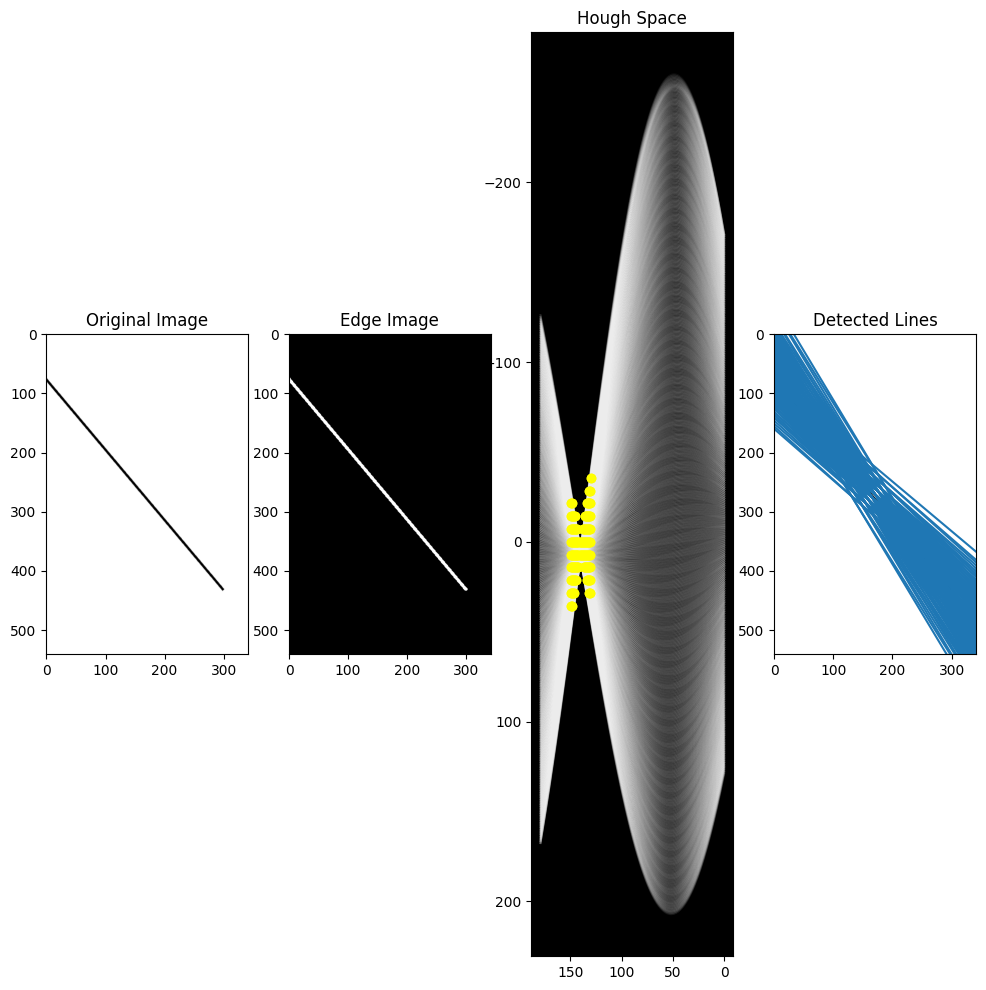

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-6.40880644e+02, -6.33759748e+02, -6.26638852e+02, -6.19517956e+02,
        -6.12397060e+02, -6.05276164e+02, -5.98155268e+02, -5.91034372e+02,
        -5.83913476e+02, -5.76792580e+02, -5.69671684e+02, -5.62550788e+02,
        -5.55429892e+02, -5.48308996e+02, -5.41188099e+02, -5.34067203e+02,
        -5.26946307e+02, -5.19825411e+02, -5.12704515e+02, -5.05583619e+02,
        -4.98462723e+02, -4.91341827e+02, -4.84220931e+02, -4.77100035e+02,
        -4.69979139e+02, -4.62858243e+02, -4.55737347e+02, -4.48616451e+02,
        -4.41495555e+02, -4.34374659e+02, -4.27253763e+02, -4.20132867e+02,
        -4.13011971e+02, -4.05891075e+02, -3.98770179e+02, -3.91649283e+02,
        -3.84528386e+02, -3.77407490e+02, -3.70286594e+02, -3.63165

In [109]:
image = cv2.imread("/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 1 -BG/theory/dataset/line_detection.png")
edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
edge_image = cv2.Canny(edge_image, 100, 200)
edge_image = cv2.dilate(
     edge_image,
    cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
     iterations=1
)
edge_image = cv2.erode(
  edge_image,
  cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
  iterations=1
)
line_detection_vectorized(image, edge_image)

In [114]:
#Contour Detection Opencv

import cv2  # import OpenCV library

# Read image for contour detection
input_image = cv2.imread("/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 1 -BG/theory/dataset/shapes.png")


# Make a copy to draw bounding box
input_image_cpy = input_image.copy()

# Convert input image to grayscale
gray_img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)


cv2.imshow("gray_img", gray_img)
cv2.waitKey(0)

# Convert the grayscale image to binary (image binarization opencv python)
ret, binary_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)

cv2.imshow("binary_img",binary_img)
cv2.waitKey(0)

# Invert image
inverted_binary_img = ~ binary_img

cv2.imshow("inverted_binary_img",inverted_binary_img)
cv2.waitKey(0)


# Detect contours
# hierarchy variable contains information about the relationship between each contours
contours_list, hierarchy = cv2.findContours(inverted_binary_img,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE) # Find contours

# Draw a bounding box around all detected contours
for c in contours_list:
    x, y, w, h = cv2.boundingRect(c)

    # Make sure contour area is large enough
    if (cv2.contourArea(c)) > 10000:
        cv2.rectangle(input_image_cpy, (x, y), (x + w, y + h), (0, 0, 255), 5)


cv2.imshow("input_image_cpy", input_image_cpy)
cv2.waitKey(0)
close_window_macos()

In [116]:
import cv2

# Read image for contour detection
input_image = cv2.imread("/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 1 -BG/theory/dataset/shapes.png")


def shape_detection(input_image):
    # Make a copy to draw bounding box
    input_image_cpy = input_image.copy()

    # Convert input image to grayscale
    gray_img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)


    # Convert the grayscale image to binary (image binarization opencv python)
    ret, binary_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)

    # Invert image
    inverted_binary_img = ~ binary_img

    # Detect contours
    # hierarchy variable contains information about the relationship between each contours
    contours_list, hierarchy = cv2.findContours(inverted_binary_img,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE) # Find contours

    # for each detected contours
    for contour_num in range(len(contours_list)):

        # Draw detected contour with shape name
        contour1 = cv2.drawContours(input_image_cpy, contours_list, contour_num, (255, 0, 255), 3)

        # Find number of points of detected contour
        end_points = cv2.approxPolyDP(contours_list[contour_num], 0.01 * cv2.arcLength(contours_list[contour_num], True), True)

        # Make sure contour area is large enough (Rejecting unwanted contours)
        if (cv2.contourArea(contours_list[contour_num])) > 10000:

            # Find first point of each shape
            point_x = end_points[0][0][0]
            point_y = end_points[0][0][1]

            # Writing shape name at center of each shape in black color (0, 0, 0)
            text_color_black = (0, 0, 0)

            # If a contour have three end points, then shape should be a Triangle
            if len(end_points) == 3:
                cv2.putText(input_image_cpy, 'Triangle', (point_x, point_y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, text_color_black, 2)

            # If a contour have four end points, then shape should be a Rectangle or Square
            elif len(end_points) == 4:
                cv2.putText(input_image_cpy, 'Rectangle', (point_x, point_y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, text_color_black, 2)

            # If a contour have five end points, then shape should be a Pentagon
            elif len(end_points) == 5:
                cv2.putText(input_image_cpy, 'Pentagon', (point_x, point_y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, text_color_black, 2)

            # If a contour have ten end points, then shape should be a Star
            elif len(end_points) == 10:
                cv2.putText(input_image_cpy, 'Star', (point_x, point_y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, text_color_black, 2)

            # If a contour have more than ten end points, then shape should be a Star
            else:
                cv2.putText(input_image_cpy, 'circle', (point_x, point_y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, text_color_black, 2)

       
    return contour1 
    
cv2.imshow("contour1",shape_detection(input_image))
cv2.waitKey(0)
cv2.destroyAllWindows()
for i in range (1,5): #trick for closing the display window on macos
    cv2.waitKey(1)

In [117]:
#Read and display image using camera
import cv2
def show_webcam():
    cam = cv2.VideoCapture(0)
    while True:
        ret_val, img = cam.read()
        cv2.imshow('my webcam', img)
        if cv2.waitKey(1) == ord('q'):
            break
    cam.release()
    cv2.destroyAllWindows()
    for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)
show_webcam()

In [23]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

def rectangle_detection(input_image):
    # Make a copy to draw bounding box
    input_image_cpy = input_image.copy()

    # Convert input image to grayscale
    gray_img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Convert the grayscale image to binary (image binarization opencv python)
    ret, binary_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
    
    cv2.imshow("binary_img",binary_img)

        
    # Invert image
    inverted_binary_img = ~ binary_img

    kernel = np.ones((5, 5), np.uint8)

    inverted_binary_img = cv2.erode(inverted_binary_img, kernel, iterations=2)
    inverted_binary_img = cv2.dilate(inverted_binary_img, kernel, iterations=2)


    
    # Detect contours
    # hierarchy variable contains information about the relationship between each contours
    contours_list, hierarchy = cv2.findContours(inverted_binary_img,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE) # Find contours

    contour1 = input_image_cpy
    # for each detected contours
    for contour_num in range(len(contours_list)):

        
        
        # Make sure contour area is large enough (Rejecting unwanted contours)
        if (cv2.contourArea(contours_list[contour_num])) > 1000:
            
            
            # Find number of points of detected contour
            end_points = cv2.approxPolyDP(contours_list[contour_num], 0.01 * cv2.arcLength(contours_list[contour_num], True), True)

        
            # Find first point of each shape
            point_x = end_points[0][0][0]
            point_y = end_points[0][0][1]

            # Writing shape name at center of each shape in black color (0, 0, 0)
            text_color_black = (0, 0, 0)

            # If a contour have three end points, then shape should be a Triangle
            if len(end_points) == 4:
                cv2.putText(input_image_cpy, 'Rectangle', (point_x, point_y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, text_color_black, 2)
                contour1 = cv2.drawContours(input_image_cpy, contours_list, contour_num, (255, 0, 255), 3)

         
    return contour1

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
  
    frame = cv2.resize(frame, (640, 480))
    frame = rectangle_detection(frame)
    cv2.imshow("Detection Result",frame)


    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)

In [118]:
import cv2
import argparse

backSub = cv2.createBackgroundSubtractorMOG2()

## [capture]
capture = cv2.VideoCapture("/Users/nguyendinhvinh2004gmail.com/Downloads/vtest.avi.mp4")
if not capture.isOpened():
    print('Unable to open: ' + args.input)
    exit(0)
## [capture]


ret, frame = capture.read()
while True:
    ret, frame = capture.read()
    if frame is None:
        break

    ## [apply]
    #update the background model
    fgMask = backSub.apply(frame)
    ## [apply]

    ## [display_frame_number]
    #get the frame number and write it on the current frame
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    ## [display_frame_number]

    ## [show]
    #show the current frame and the fg masks
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)
    cv2.waitKey(1)
    ## [show]

    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break
        
capture.release()
result.release()
cv2.destroyAllWindows()
for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)

AttributeError: 'numpy.ndarray' object has no attribute 'release'

In [9]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25861 sha256=8fe211f1ac963b2fc651a1719e9a7df311df4a8d5a1127832db6a6366ecd2277
  Stored in directory: /Users/nguyendinhvinh2004gmail.com/Library/Caches/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [ ]:
import cv2
import numpy as np


frame1 = cv2.imread("/Users/nguyendinhvinh2004gmail.com/frame1.png")
frame2 = cv2.imread("/Users/nguyendinhvinh2004gmail.com/frame2.png")

# Convert input image to grayscale
gray_img1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

diff_img = gray_img1 - gray_img2

ret, binary_img = cv2.threshold(diff_img, 70, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)

diff_img_erode = cv2.erode(binary_img, kernel, iterations=1)

diff_img_dilate = cv2.dilate(diff_img_erode, kernel, iterations=1)

    
# # Convert the grayscale image to binary (image binarization opencv python)
# ret, binary_img = cv2.threshold(gray_img, 70, 255, cv2.THRESH_BINARY)

#     # Invert image
#     inverted_binary_img = ~ binary_img

#     kernel = np.ones((5, 5), np.uint8)

#     inverted_binary_img = cv2.erode(inverted_binary_img, kernel, iterations=5)
#     inverted_binary_img = cv2.dilate(inverted_binary_img, kernel, iterations=5)


# cv2.imshow('frame1', gray_img1)
# cv2.imshow('frame2', gray_img2)
# cv2.imshow('differ', binary_img)
# cv2.imshow('diff_img_erode', diff_img_erode)
cv2.imshow('diff_img_dilate', diff_img_dilate)

cv2.waitKey(0)
    
capture.release()
cv2.destroyAllWindows()
for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)
